# 鐵達尼號生存預測


### import需要的函數 (loading package)

In [1]:
# loading package
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

### 輸入資料(loading data)

In [2]:
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")#
submit = pd.read_csv('gender_submission.csv')
# full_data=[df_train,df_test]
print(df_train.shape)
print(df_test.shape)
#print(df_data.shape)
print(type(df_test.columns))
#df_test.columns-df_train.columns #Lengths must match to compare
#list(df_train.columns)-list(df_test.columns) #list不能相加減
set(df_train.columns)-set(df_test.columns)

(891, 12)
(418, 11)
<class 'pandas.core.indexes.base.Index'>


{'Survived'}

### 探索性分析:
*  觀察
*  假設
*  驗證

In [3]:
#觀察-train
display(df_train.head(5))


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [5]:
display(df_train.describe())
print(train_df.columns.values)

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
# 觀察-test
print(df_test.head(5))
print(df_test.info())
display(df_test.describe())


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [7]:
### train and test 資料合併
# 思考為什麼要合併，明明 test 中沒有存活的資訊?
data = df_train.append(df_test)
#data=[df_train,df_test]
data.reset_index(inplace=True, drop=True)



### 探索性資料分析
* 假設與驗證的迴圈

In [28]:
# 看存活人數的數量分布
sns.countplot(df_train['Survived'])
df_train['Survived'].mean()
#結論: 死亡的人數比較多

0.3838383838383838

In [9]:
#看Pclass和存活的關係

print(df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [33]:
#存活和艙等的關係
data_plot=df_train.groupby(['Pclass']).sum()
display(data_plot)
sns.countplot(df_train['Pclass'], hue=data['Survived'])
#以比例來看，艙等三的存活比例低，艙等2次之，艙等1存活比例最高

PassengerId  Survived      Age  SibSp  Parch        Fare
Pclass                                                          
1             99705       136  7111.42     90     77  18177.4125
2             82056        87  5168.83     74     70   3801.8417
3            215625       119  8924.92    302    193   6714.6951

In [35]:
#存活和性別的關係
sns.countplot(df_train['Sex'], hue=data['Survived'])
print (df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())
# 性別，男性的存活比例低

      Sex  Survived
0  female  0.742038
1    male  0.188908


     Cabin  Survived
0      A10  0.000000
1      A14  0.000000
2      A16  1.000000
3      A19  0.000000
4      A20  1.000000
5      A23  1.000000
6      A24  0.000000
7      A26  1.000000
8      A31  1.000000
9      A32  0.000000
10     A34  1.000000
11     A36  0.000000
12      A5  0.000000
13      A6  1.000000
14      A7  0.000000
15    B101  1.000000
16    B102  0.000000
17     B18  1.000000
18     B19  0.000000
19     B20  1.000000
20     B22  0.500000
21     B28  1.000000
22      B3  1.000000
23     B30  0.000000
24     B35  1.000000
25     B37  0.000000
26     B38  0.000000
27     B39  1.000000
28      B4  1.000000
29     B41  1.000000
..     ...       ...
117    E12  1.000000
118   E121  1.000000
119    E17  1.000000
120    E24  1.000000
121    E25  1.000000
122    E31  0.000000
123    E33  1.000000
124    E34  1.000000
125    E36  1.000000
126    E38  0.000000
127    E40  1.000000
128    E44  0.500000
129    E46  0.000000
130    E49  1.000000
131    E50  1.000000
132    E58  0

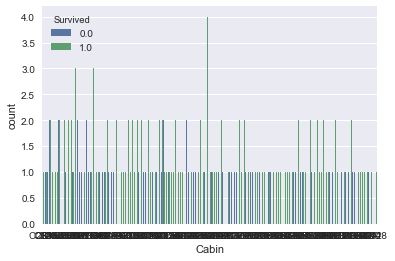

In [39]:
#存活和 Cabin的關係
sns.countplot(df_train['Cabin'], hue=data['Survived'])
print (df_train[["Cabin", "Survived"]].groupby(['Cabin'], as_index=False).mean())
#似乎兩者有相關性

In [ ]:
#存活和 Embakerd的關係
sns.countplot(df_train['Embarked'], hue=data['Survived'])
print (df_train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean())
#登船港口，C的存活比例最高，Q次之，S最低
#似乎兩者有相關性
#2019/09/28

In [13]:
# 連續型用分布圖行來看
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
#年紀小的存活率較高。年紀大的因為人少，看不出趨勢

In [14]:
#連續型用分布圖形來看
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)
#票價低的存活比例較低

In [15]:
#連續型用分布圖形來看
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Parch', kde=False)
#有兄弟姊妹的存活率較高

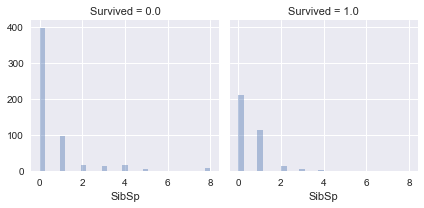

In [16]:
#連續型用分布圖形來看
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'SibSp', kde=False)
#有兄弟姊妹的存活率較高

## Missing Value-Embarked,Fare,age


In [17]:
# Emnarked
data['Embarked'] = data['Embarked'].fillna('S')

In [18]:
# Fare
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [20]:
#Cabin
data['Cabin'].head(10)
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')
data["Cabin"].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [21]:
#Cabin 觀察遺失的樣態
sns.countplot(data['Cabin'], hue=data['Survived'])
#結論，遺失的死亡率比較高

In [22]:
# Age
data['Age'] = data['Age'].fillna(data['Age'].mean())

### Feature Engineering特徵工程
* 通常文字型態都隱藏很多其他資訊
* 型態轉換

## Model training
* 這邊單純採用 RandomForest


In [23]:

data['Sex'] = data['Sex'].astype('category')
display(data.head(5))
data['Sex'] = data['Sex'].astype('category').cat.codes
display(data.head(5))

# Categories (2, object)
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
d = dict(enumerate(data['Cabin'].astype('category').cat.categories))
print (d)
data['Cabin'] = data['Cabin'].astype('category').cat.codes

display(data.head(5))
display(data.info())

Age    Cabin Embarked     Fare  \
0  22.0  NoCabin        S   7.2500   
1  38.0        C        C  71.2833   
2  26.0  NoCabin        S   7.9250   
3  35.0        C        S  53.1000   
4  35.0  NoCabin        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450

Age    Cabin Embarked     Fare  \
0  22.0  NoCabin        S   7.2500   
1  38.0        C        C  71.2833   
2  26.0  NoCabin        S   7.9250   
3  35.0        C        S  53.1000   
4  35.0  NoCabin        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket  
0       3    1      1       0.0         A/5 21171  
1       1    0      1       1.0          PC 17599  
2       3    0      0       1.0  STON/O2. 3101282  
3       1    0      1       1.0            113803  
4       3    1      0       0.0            373450

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'NoCabin', 8: 'T'}


Age  Cabin  Embarked     Fare  \
0  22.0      7         2   7.2500   
1  38.0      2         0  71.2833   
2  26.0      7         2   7.9250   
3  35.0      2         2  53.1000   
4  35.0      7         2   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket  
0       2    1      1       0.0         A/5 21171  
1       0    0      1       1.0          PC 17599  
2       2    0      0       1.0  STON/O2. 3101282  
3       0    0      1       1.0            113803  
4       2    1      0       0.0            373450

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          1309 non-null int8
Embarked       1309 non-null int8
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int8
Sex            1309 non-null int8
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(3), int8(4), object(2)
memory usage: 87.0+ KB


None

In [24]:
#產生訓練和測試的資料
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex','Cabin']]
dataTest = dataTest[['Age', 'Embarked', 'Fare',  'Pclass', 'Sex','Cabin']]

In [25]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 
rf.fit(dataTrain.iloc[:, 1:dataTrain.shape[1]], dataTrain.iloc[:, 0])
print("this {0}".format(rf.oob_score_))

#ValueError: could not convert string to float: 'NoCabin'
#ValueError: Input contains NaN, infinity or a value too large for dtype('float32').-->Age

this 0.8204264870931538


In [26]:
pd.concat((pd.DataFrame(dataTrain.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

variable  importance
4       Sex    0.368865
2      Fare    0.220066
0       Age    0.187315
3    Pclass    0.104140
5     Cabin    0.084049
1  Embarked    0.035565

In [27]:
# Submit(418 rows × 2 columns)
rf_res =  rf.predict(dataTest)
submit['Survived'] = rf_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)